In [25]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
21970,21971,2015,9,2,10,8.0,13.0,NaN,13.0,500.0,63.0,27.500,1005.5,14.5,0.0,NNW,2.5,Dingling
31968,31969,2016,10,23,0,14.0,23.0,2.0,5.0,400.0,2.0,9.075,1016.0,5.7,0.0,NW,1.5,Dingling
32705,32706,2016,11,22,17,7.0,18.0,3.0,5.0,300.0,60.0,-2.400,1028.7,-18.1,0.0,WNW,4.1,Dingling
27889,27890,2016,5,6,1,358.0,NaN,2.0,2.0,100.0,87.0,17.600,1000.8,-8.6,0.0,NW,4.7,Dingling
7588,7589,2014,1,11,4,37.0,50.0,51.0,39.0,900.0,11.0,-8.400,1022.5,-20.5,0.0,W,0.7,Dingling
19252,19253,2015,5,12,4,5.0,5.0,2.0,10.0,200.0,67.0,11.100,987.7,5.0,0.0,NNW,1.6,Dingling
18156,18157,2015,3,27,12,107.0,147.0,17.0,48.0,800.0,100.0,16.800,1011.9,1.2,0.0,SSE,1.9,Dingling
9554,9555,2014,4,3,2,98.0,121.0,10.0,38.0,800.0,40.0,12.500,1015.5,-8.7,0.0,NNW,2.6,Dingling
32640,32641,2016,11,20,0,120.0,141.0,5.0,49.0,1500.0,6.0,7.800,1015.9,5.3,0.0,ESE,2.4,Dingling
370,371,2013,3,16,10,282.0,266.0,70.0,103.0,1800.0,82.0,12.900,1017.1,-0.4,0.0,SSE,1.7,Dingling


In [3]:
df.shape

(35064, 18)

In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [5]:
def overview(df, col=None):
    
    print(f'Shape of the dataframe: {df.shape}\n')

    print(f'Data types of the columns:\n\n{df.dtypes}\n')
    
    # Convert null values counts to a DataFrame and print it
    null_counts = pd.DataFrame(df.isnull().sum(), columns=['Null Counts'])
    print(f'Null values counts:')
    return null_counts

    if col is not None:
        df[col] = pd.to_datetime(df[col])
        print(f'Range:\nStart: {df[col].min()}')
        print(f'End: {df[col].max()}\n')
        
        total_days = (df[col].max() - df[col].min()).days
        print(f'Total days: {total_days}')


In [6]:
overview(df)


Shape of the dataframe: (35064, 18)

Data types of the columns:

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

Null values counts:


,Null Counts
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [10]:
df_AIQ = df.copy() 
df_AIQ['datetime'] = pd.to_datetime(df_AIQ[['year', 'month', 'day', 'hour']])
df_AIQ.insert(0, 'datetime', df_AIQ.pop('datetime'))
df_AIQ.head()

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [11]:
df_AIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   No        35064 non-null  int64         
 2   year      35064 non-null  int64         
 3   month     35064 non-null  int64         
 4   day       35064 non-null  int64         
 5   hour      35064 non-null  int64         
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [17]:
df_AIQ.describe()

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,NaN,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808


In [20]:
df_AIQ.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [22]:
df_AIQ.loc['2013-03-01':'2013-03-05'].shape

(120, 18)

In [27]:
pm = df_AIQ['PM2.5']
pm.head()

datetime
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='datetime'>

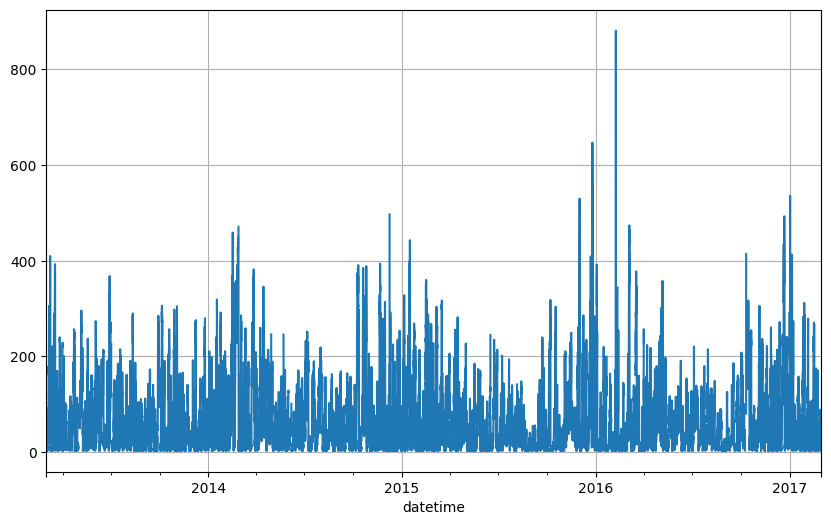

In [28]:
pm.plot(grid=True)

<Axes: xlabel='datetime'>

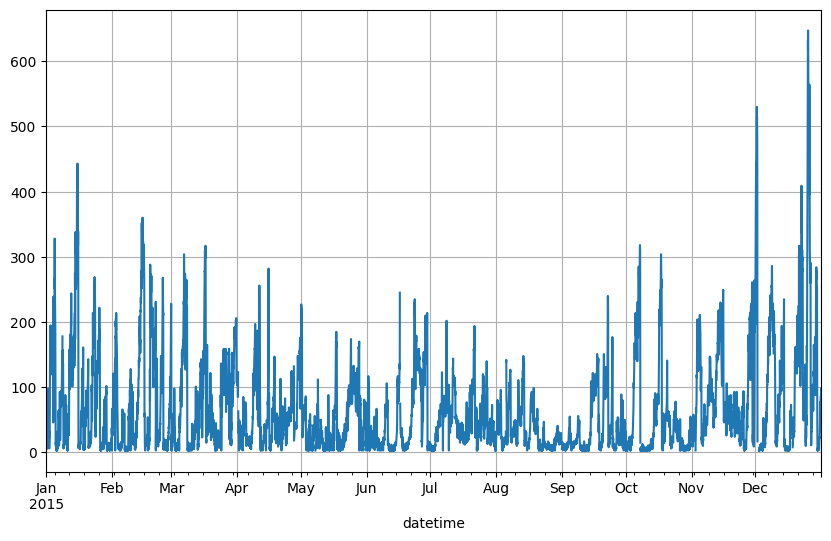

In [29]:
df_AIQ_2015 = df_AIQ.loc['2015']
pm_2015 = df_AIQ_2015['PM2.5']
pm_2015.plot(grid=True)